### Objective:
- Evaluate Conversion Rate metric
- Build a model that can predict conversion rate
- Derive ideas to improve revenue

## 1. Data Preparation

In [1]:
# Import the necessary libraries

# Import pandas and numpy
import numpy as np
import pandas as pd

# Import seaborn and matplotlib  -> graphics
import matplotlib.pyplot as plt
import seaborn as sns

# I will import the necessary sklearn modules later

In [2]:
# Import the raw data using read_csv
df = pd.read_csv('conversion_data.csv')

In [3]:
df.info() # check data quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


According to the information provided, all columns are categorical data except age and total_pages_visited. Let's start by evaluating the conversion rate: #_conversions / total_sessions.

However, before doing so, I need to make sure the values are realisitic in each category.

In [4]:
df.describe()
# Use describe to get summary statistics
# but here we can only get summary statistics of Dtype = int64

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


max(age) = 123 is really abnormal

In [5]:
# So we need to check information of categorical columns
# Here we use unique
print(df['country'].unique())
print(df['source'].unique())

['UK' 'US' 'China' 'Germany']
['Ads' 'Seo' 'Direct']


#### summary statistics Conclusion:
- Despite the max age likely being an anamoly, the remainder of the numerical columns consists of values that are within expectations. 
- Additionally, the values in the categorical columns are also within expectations.

## 2. Basic Analytics

#### Basic Knowledge

In [6]:
# count convertion rate
conversion_rate = df['converted'].sum() / len(df)
print ('Total Conversion Rate: {:.2f}%'.format(conversion_rate * 100))   

Total Conversion Rate: 3.23%


From this point, I'm going to evaluate the conversion rate across values within particular categories. I will provide visualizations for all of them (bar plots from seaborn). By doing so, I hope to isolate values that perform particularly well in terms of conversion rate. I will also take note of the occurrence of each value as that creates a weight to the importance of the value.

To ease the calculations later on, I will create a count column filled with 1's to yield the total occurrence of each value.

In [7]:
# Create a count column filled with 1's
# then 1 row represents 1
df['count'] = 1

In [8]:
# Note for create_df
new_df = df.groupby('age').agg({'converted':sum,'count':sum})
new_df['total_percentage'] = new_df['count']/new_df['count'].sum() 
# num of each age / total rows -> 7597/316200 = 0.024026
new_df['conversion_rate'] = new_df['converted'] / new_df['count']
# 544 / 7597 = 0.071607
new_df.head(5)
# this is explanation of 2 defition below
# if cat = age, then we group by age, and count num of converted = 1 and total num

,converted,count,total_percentage,conversion_rate
age,,,,
17,544,7597,0.024026,0.071607
18,559,8466,0.026774,0.066029
19,548,9349,0.029567,0.058616
20,580,10156,0.032119,0.057109
21,592,10966,0.034681,0.053985


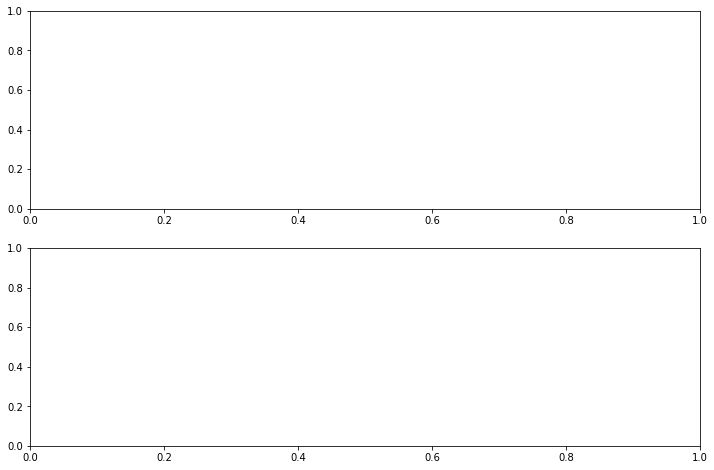

In [9]:
# Note for create_plots
fig, ax = plt.subplots(nrows=2, figsize=(12,8))
# nrows=2 -> 2 rows
# figsize=(12,8) -> length: 12; width: 8

#### Analytics - Single Metric
- Check distribution of each metric and observe metric healthy

In [10]:
# Define a function create_df that will create a new dataframe with the conversion rate according to the groupings
def create_df(cat):
    '''Group the data by the [cat]'''
    new_df = df.groupby(cat).agg({'converted':sum, 'count':sum})
    new_df['total_percentage'] = new_df['count'] / new_df['count'].sum()
    #     new_df['count'] / new_df['count'].sum  -> num of this row / total rows
    new_df['conversion_rate'] = new_df['converted'] / new_df['count']
    #     num of converted of each row / num of count of each row -> for one group, its conversion rate
    return new_df

# Define a function create_plots to create barplots according to the provided dataframe
def create_plots(df):
    '''Plot barplots and histograms for conversion rate and ditribution 
    given the dataframe'''
    fig, ax = plt.subplots(nrows=2, figsize=(12,8))
    
#     plot the distribution -> bar chart
    sns.barplot(x=df.index, y='count', data=df, ax=ax[0])
    
#     plot the conversion rate
    sns.barplot(x=df.index, y='conversion_rate', data=df, ax=ax[1])
    
    plt.tight_layout()

###### 1. Country

         converted   count  total_percentage  conversion_rate
country                                                      
China          102   76602          0.242258         0.001332
Germany        816   13056          0.041290         0.062500
UK            2550   48450          0.153226         0.052632
US            6732  178092          0.563226         0.037801


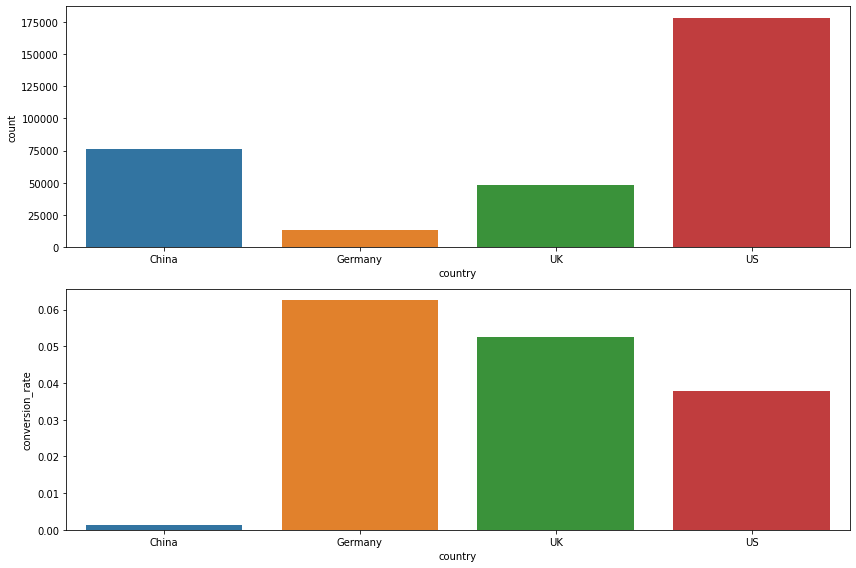

In [11]:
# create a country dataframe with 2 definition above
country_df = create_df('country')

print(country_df)

# plot the country distribution and conversion rates
create_plots(country_df)

Despite China's fairly high count (24% of total), it has the lowest conversion rate. It seems that site has very poor performance in China. In comparison, Germany and UK have very high performances, but Germany has a very low occurrence (4% of total).

###### 2. Age
- Because Age range is from 17 - 123, we cannot use bar chart to describe the distribution
- so here we choose regresion distribution

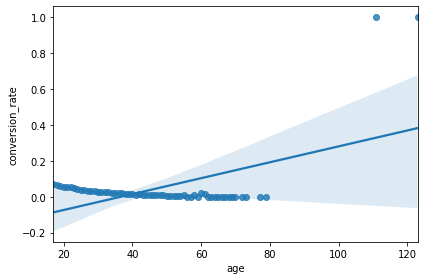

In [12]:
# Create an age dataframe
age_df = create_df('age').reset_index() 
# without reset_index(), the index would be age
# with reset_index() , the index would 0,1,2...


# # Plot the country distribution
# fig, ax = plt.subplots(nrows=2, figsize=(12,8))

# # Plot the distribution
# sns.barplot(x=age_df.index, y='count', data=age_df, ax=ax[0])

# Plot the scatterplot for conversion rate
sns.regplot(x=age_df['age'], y=age_df['conversion_rate'])

plt.tight_layout()


It appears the two entries where age > 100 have 100% conversion rates. This causes a skew in the trend of the data. As a result, I will remove those two points from my visualizations to better provide a general trend.

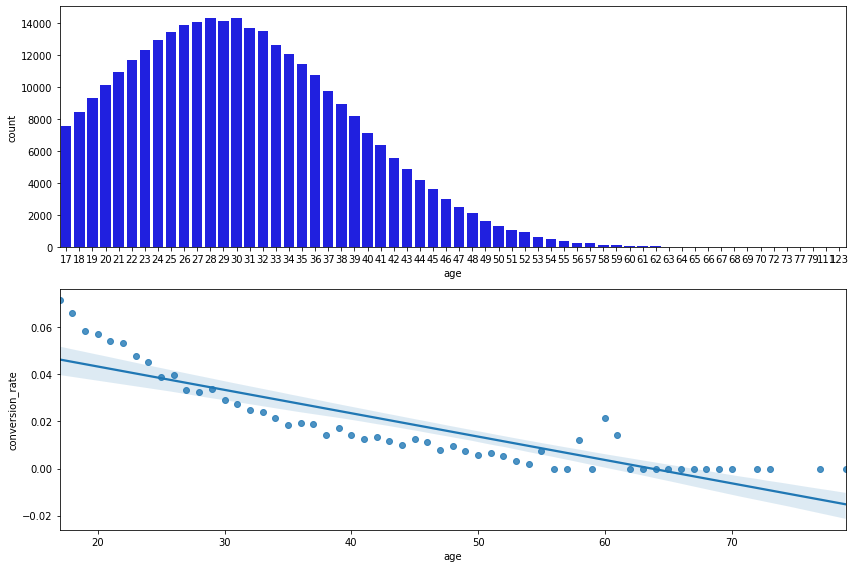

In [13]:
# Plot the age distribution
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

# Plot the distribution
sns.barplot(x='age', y='count', data=age_df, ax=ax[0], color='b')

# Plot the scatterplot for conversion rate
sns.regplot(x='age', y='conversion_rate', data=age_df[age_df['age'] < 100], ax=ax[1])

plt.tight_layout()

# age_plot = age_df[age_df['age'] < 100]

In [14]:
print (age_df.loc[(age_df['age'] < 40), 'count'].sum() / age_df['count'].sum())
# from bar chart, we notice most people are under 40 years old
# but here we try to count % of people under 40 years old

0.8506388361796331


Most of the data (85%) occurs within the 17 - 40 age range. The conversion rates in relation to age appear similar to a negative exponential（指数） or negative logarithmic graph（对数）. There is a visible decline in conversion rates as age increases, but this decline plateaus around age 58.

###### 3. New Users?

          converted   count  total_percentage  conversion_rate
new_user                                                      
0              7161   99456          0.314535         0.072002
1              3039  216744          0.685465         0.014021


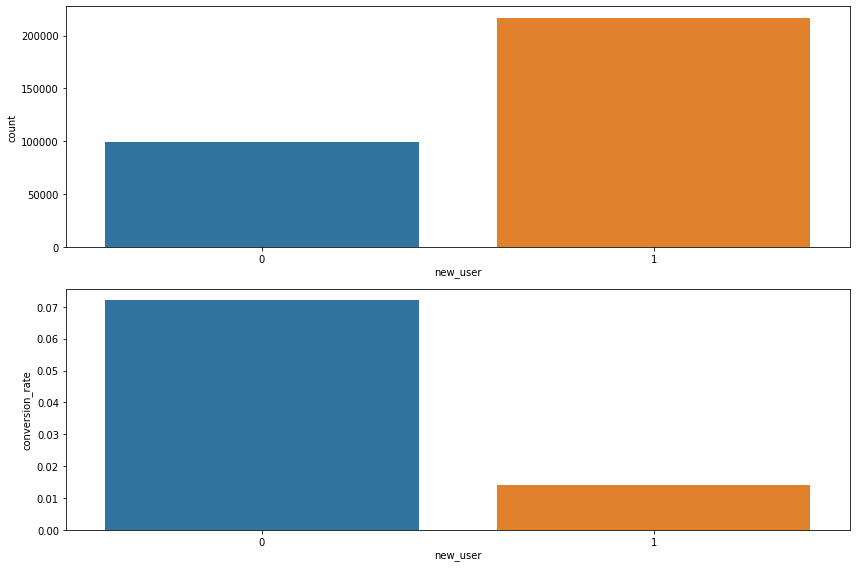

In [15]:
# Create a new user dataframe
new_user_df = create_df('new_user')

print (new_user_df)

# Plot the new user distribution and conversion rates
create_plots(new_user_df)

There is a much higher conversion with users that have already have an account. However, users without accounts make an a majority of the website traffic.

###### 4. Source

        converted   count  total_percentage  conversion_rate
source                                                      
Ads          3060   88740          0.280645         0.034483
Direct       2040   72420          0.229032         0.028169
Seo          5100  155040          0.490323         0.032895


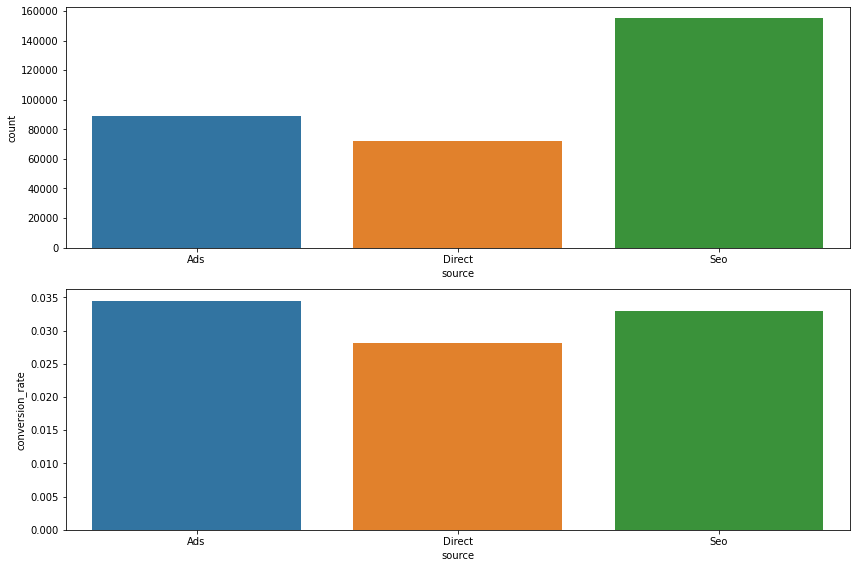

In [16]:
# Create a source dataframe
source_df = create_df('source')

print (source_df)

# Plot the source distribution and conversion rates
create_plots(source_df)

The higher conversion rates occur via users that arrive to the site via advertisements or search results. Most of the traffic comes via search results.

###### 5. Total Page Visit

<AxesSubplot:xlabel='total_pages_visited', ylabel='conversion_rate'>

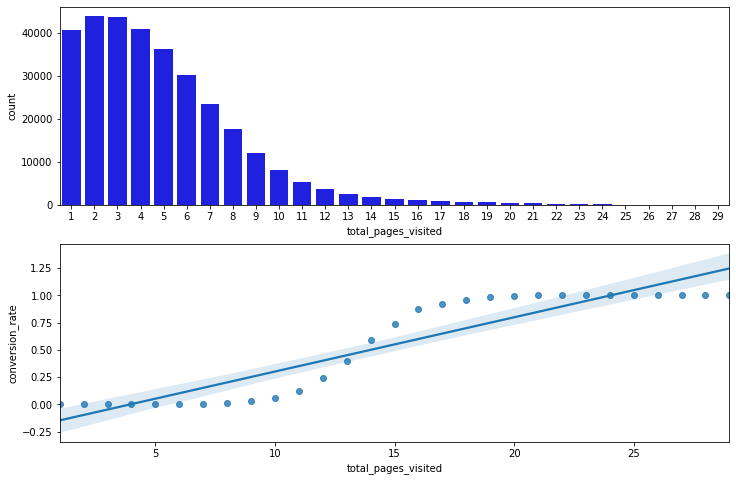

In [17]:
# Create a Total Page Visit dataframe
pages_df = create_df('total_pages_visited').reset_index()

fig, ax = plt.subplots(nrows=2, figsize=(12,8))

# Plot the distribution
sns.barplot(x='total_pages_visited', y='count', data=pages_df, ax=ax[0], color='b')

# Plot the conversion rates on the scatter plot
sns.regplot(x='total_pages_visited', y='conversion_rate', data=pages_df, ax=ax[1])

A majority of the entries visit less than 10 pages. For the conversion rate, there appears to be a sigmoid relationship between conversion rate and total_pages_visited.

Summary:

- China has very low performance whereas Germany has very high conversion rates (Germany > UK > USA > China). -> Actionable
- There is a negative correlation between age and conversion rates (graph shows a negative exponential or negative logarithmic relationship). -> Actionable
- Users with accounts are more likely to make a purchase (convert). -> Actionable
- Most traffic is derived from search results. Ads and search results have higher conversion rates than direct traffic. -> Actionable
- There is a positive correlation between number of pages visited and conversion rates (graph shows a sigmoid relationship, plateauing at ~16 pages) -> Not actionable.

Since I don't believe we can efficiently change the number of pages a user visits, I don't believe that correlation can be acted on. Additionally, targetting users without an account is also inefficient since users who have an account have likely made a past purchase (to make a purchase, you need to make an account).

Before I make my suggestions, I'd like to do further analysis with the performance of different sources across different countries.

#### Analytics - Multiple Metrics

In [18]:
# Create a dataframe with the country and source 
country_source_df = create_df(['country', 'source']).reset_index()

country_source_df

,country,source,converted,count,total_percentage,conversion_rate
0,China,Ads,32,21561,0.068188,0.001484
1,China,Direct,24,17463,0.055228,0.001374
2,China,Seo,46,37578,0.118843,0.001224
3,Germany,Ads,251,3760,0.011891,0.066755
4,Germany,Direct,153,2864,0.009058,0.053422
5,Germany,Seo,412,6432,0.020342,0.064055
6,UK,Ads,752,13518,0.042751,0.055630
7,UK,Direct,515,11131,0.035202,0.046267
8,UK,Seo,1283,23801,0.075272,0.053905
9,US,Ads,2025,49901,0.157815,0.040580


<AxesSubplot:xlabel='source', ylabel='conversion_rate'>

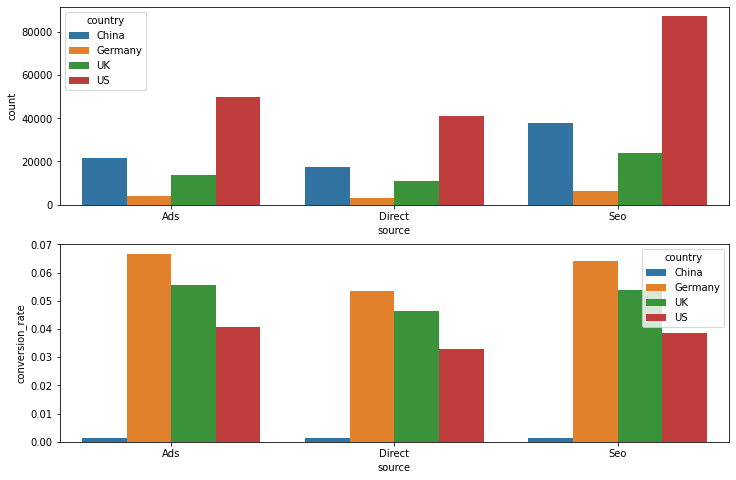

In [19]:
fig, ax = plt.subplots(nrows=2, figsize=(12,8))

# Plot the distribution
sns.barplot(x='source', y='count', hue='country', data=country_source_df, ax=ax[0])

# Plot the conversion rates
sns.barplot(x='source', y='conversion_rate', hue='country', data=country_source_df, ax=ax[1])

Despite fair amount of traffic from China, China has poor conversion rates across all site traffic sources. In comparison, Germany and UK have low volumes of traffic, but higher conversion rates.

#### Suggestions:
- Target younger age groups (there is a negative correlation between age and conversion rates)
- Redistribute advertisements or efforts to increase social media presence to address higher performing countries (particularly Germany and UK). Note that US performs around the average conversion rate.
- Focus more efforts into users with accounts.

## 3. Let's create the classification model to predict the conversion.

- From conversion, I can generate conversion rates.

- Before creating the model, I will remove the two outlier ages to improve model performance.

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import labelencoder
from sklearn.preprocessing import LabelEncoder

# Import roc_auc_curve
from sklearn.metrics import roc_auc_score

#### 1. Basic Test

In [21]:
# Use LabelEncoder on the categorical columns
processed_df = df[df['age'] < 110].copy()

# Define the numerical columns
NUMERICAL = ['age', 'total_pages_visited']

# Define the categorical columns
CATEGORICAL = ['country', 'new_user', 'source']

In [22]:
# Apply LabelEncoder to the categorical variables with text
for col in ['country', 'source']:
    processed_df[col] = LabelEncoder().fit_transform(processed_df[col])
#     we give 4 country and 3 source a label (0,1,2) instead of categorical variables itself

In [23]:
# Define the X and y data
test_X = processed_df.drop(['count', 'converted'], axis=1) 
# we choose all metrics as Independent variable except count and converted
# axis = 1 -> drop this column

test_y = processed_df['converted'] # we choose converted as dependent variable

# Split the test and training data
# we have imported train_test_split function from sklearn
test_X_train, test_X_test, test_y_train, test_y_test = train_test_split(test_X, test_y, test_size=0.2, random_state=123)

# why we use random_state? -> https://www.jianshu.com/p/4deb2cb2502f

In [24]:
rf = RandomForestClassifier(n_estimators=200).fit(test_X_train, test_y_train)

# explanation for random forest parameter: https://blog.csdn.net/u012102306/article/details/52228516

<AxesSubplot:xlabel='importance', ylabel='feature'>

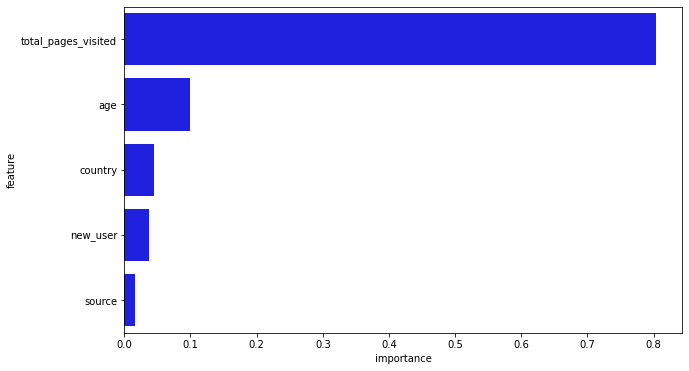

In [25]:
# Extract the feature importances and zip it with the columns into a dataframe# Extrac 
importances = rf.feature_importances_
features = pd.DataFrame({'feature': test_X.columns, 'importance': importances})
features.sort_values(by='importance', ascending=False, inplace=True)

# Display a horizontal barplot with the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=features['importance'], y=features['feature'], color='blue', orient='h')

In [26]:
# Predit the test data
predicted_test = rf.predict_proba(test_X_test)[:, -1]

# what is predict_proba? -> https://blog.csdn.net/qq_36523839/article/details/80405455?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1.control

print ('Score:     {}'.format(roc_auc_score(test_y_test, predicted_test)))
# we compare test_y_test with predicted_test and count % that match

Score:     0.9510586637809418


#### 2. Formal Building Model

In [27]:
# Define the X and y data
X = processed_df.drop(['count', 'converted'], axis=1)
y = processed_df['converted']

# Create the dummy variables and remove the original column from the X data
# For example, if one original record is from China
# then the result would be:     country0 country1 country2 country3
#                                  1         0        0       0

for col in CATEGORICAL:
    group_dummies = pd.get_dummies(X[col]).rename(columns=lambda x: col + str(x))
#     print(group_dummies)
    X = X.join(group_dummies)
    del X[col]
#     print(X)

# Split the test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
# Instantiate the RandomForestClassifier with 200 estimators
rfclf = RandomForestClassifier(n_estimators=200)

rfclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
# Predit the test data
predicted_test = rfclf.predict_proba(X_test)[:, -1]

print ('Score:     {}'.format(roc_auc_score(y_test, predicted_test)))

Score:     0.9485825442139222


In [30]:
# Predict the full conversion rate
predicted_conv_rate = predicted_test.sum() / len(predicted_test)

# print the final result
print ('Predicted Conversion Rate: {:.2f}%'.format(predicted_conv_rate * 100))

Predicted Conversion Rate: 3.16%


Although the model can reliably predict the whether a user will convert or not, the model relies too heavily on total_pages_visited. 
#### Since we can't affect the number of pages a user visits, it would be best to build a model without that variable.

In [31]:
# Define a new X
new_X = test_X.drop('total_pages_visited', axis=1)

# Split the test and training data
X_train, X_test, y_train, y_test = train_test_split(new_X, test_y, test_size=0.2, random_state=123)

In [32]:
# Instantiate the RandomForestClassifier with 200 estimators
rfclf = RandomForestClassifier(n_estimators=200)

# Fit the classifier
rfclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

<AxesSubplot:xlabel='importance', ylabel='feature'>

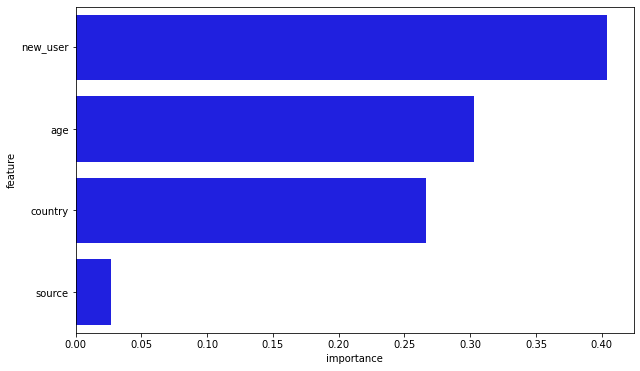

In [33]:
# Extract the feature importances and zip it with the columns into a dataframe# Extrac 
importances = rfclf.feature_importances_
features = pd.DataFrame({'feature': new_X.columns, 'importance': importances})
features.sort_values(by='importance', ascending=False, inplace=True)

# Display a horizontal barplot with the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=features['importance'], y=features['feature'], color='blue', orient='h')

In [34]:
#Predit the test data
predicted_test = rfclf.predict_proba(X_test)[:, -1]

print ('Score:     {}'.format(roc_auc_score(y_test, predicted_test)))

# Predict the full conversion rate
predicted_conv_rate = predicted_test.sum() / len(predicted_test)

# print the final result
print ('Predicted Conversion Rate: {:.2f}%'.format(predicted_conv_rate * 100))

Score:     0.8124065405785894
Predicted Conversion Rate: 3.22%


Without the total_pages_visited variable, the model relies most on new_user, with source having minimal effect on the model. The new model does perform poorer, but it's still within applicable.

Suggestions:

- Target younger age groups (there is a negative correlation between age and conversion rates)
- Redistribute advertisements or efforts to increase social media presence to address higher performing countries (particularly Germany and UK). Note that US performs around the average conversion rate.
- Focus more efforts into users with accounts.